# 안녕하세요:)

## AIVLE 1차 미니프로젝트 '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import pandas as pd

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [5]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people
df_seoul_bus_station = pd.read_csv('./seoul_bus_station.csv',encoding='UTF-8')
df_seoul_moving = pd.read_csv('./seoul_moving_day.csv', index_col=0, encoding='UTF-8')
df_seoul_business = pd.read_csv('./seoul_business.csv',index_col=0,encoding='UTF-8')
df_seoul_people = pd.read_csv('./seoul_people.csv',index_col=0,encoding='UTF-8')

In [ ]:
# df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
# df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
# df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
# df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [6]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
print("서울 버스정류장 정보")
display(df_seoul_bus_station.head(3))
print("서울 이동인구 정보")
display(df_seoul_moving.head(3))
print("서울 업종 정보")
display(df_seoul_business.head(3))
print("서울 사람 정보")
display(df_seoul_people.head(3))

서울 버스정류장 정보


,자치구,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
0,강남구,501,98,8296564,7862045,122.166392,115.768126
1,강동구,367,22,2999118,2933820,91.136441,89.152182
2,강북구,410,71,4805944,4638276,126.299380,121.893094


서울 이동인구 정보


,도착자치구코드,이동시간합계,이동인구합계,이동시간평균,이동인구평균,자치구
0,11010,26504649,19803049.50,59.819645,44.694476,종로구
1,11020,26065980,21132891.17,58.197800,47.183639,중구
2,11030,23776976,14930983.13,57.995736,36.418986,용산구


서울 업종 정보


,자치구,택시,일반음식,화물차,부동산,미용,커피,옷도매,주점업,학원,육류요리
0,강남구,2517,11486,487,6508,6255,7273,8320,2528,9020,5008
1,강동구,4980,3388,1566,1990,1429,1660,1433,1349,2104,1459
2,강북구,2589,2663,1030,867,997,1095,94,1275,740,1176


서울 사람 정보


,자치구,남자,여자,합계
0,종로구,71890,78563,150453
1,중구,63495,68298,131793
2,용산구,109826,117280,227106


In [6]:
df = pd.merge(standard,df_seoul_people,how='inner', on='자치구')
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='자치구')
df.isna().sum()

도착 시군구 코드    0
자치구          0
남자           0
여자           0
합계           0
택시           0
일반음식         0
화물차          0
부동산          0
미용           0
커피           0
옷도매          0
주점업          0
학원           0
육류요리         0
정류장수         0
노선수          0
승차총승객수       0
하차총승객수       0
승차평균승객수      0
하차평균승객수      0
도착자치구코드      0
이동시간합계       0
이동인구합계       0
이동시간평균       0
이동인구평균       0
dtype: int64

In [7]:
df['총 업체수'] = df_seoul_business.iloc[:,1:].sum(axis=1)

---

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

*정해진게 없나요? - 라벨을 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
*가설마다 라벨데이터가 달라도 상관없나요? 네 상관없습니다.
*가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

## 가설을 설정해 봅시다(최소 1개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1

자치구별 이동인구가 정류장 개수에 차이를 만들 것이다.

* 가설 2

이동인구에 따라 이동시간에 차이가 있을것이다.

* 가설 3

노선당 이동인구가 택시종사자 수에 차이를 만들것이다.

### 추가
* 평균 이동시간이 많을 수록 노선수가 적을것이다
* 종업원수 -> 평균 이동시간(혼잡도)
* 자치구별 승하차 이용인구가 많은데 이동인구가 적다면, 해당 자치구를 환승용으로 활용한 것이다.

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [18]:
# 시각화 한글폰트 설정
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')        

In [9]:
### 1)
df['노선당 이동인구'] = df['이동인구합계']/df['노선수']

In [10]:
df['총 승객수'] = df['승차총승객수'] + df['하차총승객수']

In [22]:
df['노선당 승객수'] = df['총 승객수']/df['노선수']

In [26]:
df.rename(columns={'노선당 승객수':'노선당 평균승객수'}, inplace=True)

In [11]:
df.rename(columns={'총 업체수':'총 종업원수'},inplace =True)

In [57]:
df['요식업'] = df['일반음식'] + df['육류요리'] + df['주점업'] + df['커피']

In [53]:
df.columns

Index(['도착 시군구 코드', '자치구', '남자', '여자', '인구수', '택시', '일반음식', '화물차', '부동산', '미용',
       '커피', '옷도매', '주점업', '학원', '육류요리', '정류장수', '노선수', '승차총승객수', '하차총승객수',
       '승차평균승객수', '하차평균승객수', '도착자치구코드', '이동시간합계', '이동인구합계', '이동시간평균', '이동인구평균',
       '총 종업원수', '노선당 이동인구', '총 승객수', '노선당 평균승객수'],
      dtype='object')

In [58]:
df.head()

,도착 시군구 코드,자치구,남자,여자,인구수,택시,일반음식,화물차,부동산,미용,...,도착자치구코드,이동시간합계,이동인구합계,이동시간평균,이동인구평균,총 종업원수,노선당 이동인구,총 승객수,노선당 평균승객수,요식업
0,11010,종로구,71890,78563,150453,215,5912,646,889,480,...,11010,26504649,19803049.50,59.819645,44.694476,59402,188600.471429,10596224,100916.419048,12920
1,11020,중구,63495,68298,131793,235,6414,333,1152,816,...,11020,26065980,21132891.17,58.197800,47.183639,21358,207185.207549,7395695,72506.813725,13059
2,11030,용산구,109826,117280,227106,523,2987,466,1214,777,...,11030,23776976,14930983.13,57.995736,36.418986,12526,216391.059855,8252552,119602.202899,7579
3,11040,성동구,137620,147146,284766,2527,2785,1161,1453,851,...,11040,24144722,17378528.65,58.184820,41.879404,27031,299629.804310,5631699,97098.258621,6810
4,11050,광진구,167562,183618,351180,1744,2861,985,1313,1337,...,11050,23556776,17668243.56,60.890991,45.669953,17825,410889.385116,5716991,132953.279070,8003


## 자치구별 노선당 평균승객수

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='자치구', y = '노선당 평균승객수', data=df)


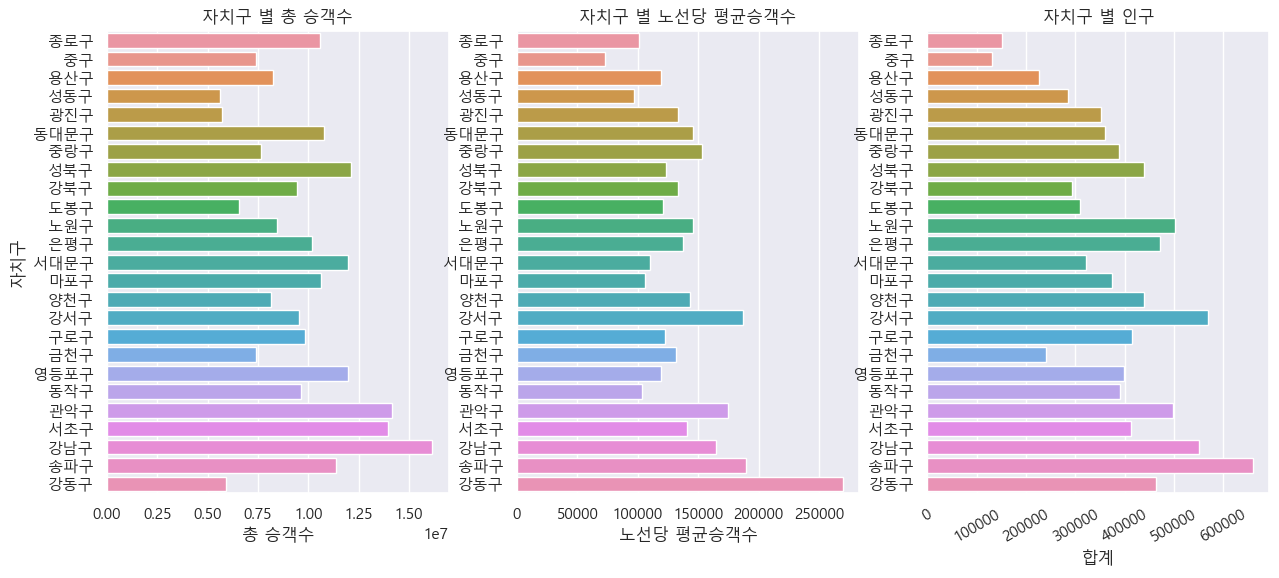

In [44]:
    plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.barplot(x='총 승객수', y='자치구', data = df)
plt.title('자치구 별 총 승객수')
# plt.xticks(rotation=60)

plt.subplot(1,3,2)
sns.barplot(x='노선당 평균승객수', y='자치구', data = df)
plt.ylabel('')
plt.title('자치구 별 노선당 평균승객수')
# plt.xticks(rotation=60)

plt.subplot(1,3,3)
sns.barplot(x='인구수', y='자치구', data = df)
plt.title('자치구 별 인구')
plt.ylabel('')
plt.xticks(rotation=30)
plt.show()


In [47]:
df.rename(columns={'합계':'인구수'}, inplace=True)

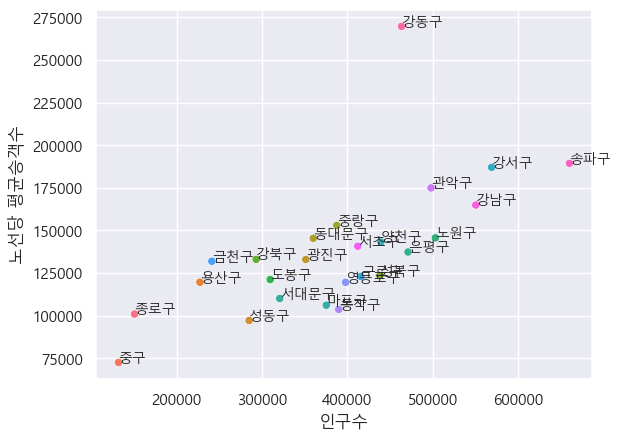

PearsonRResult(statistic=0.39567038872578186, pvalue=0.05025244672329225)

In [71]:
# 인구수 -> 노선당 평균승객수
sns.scatterplot(x='인구수', y='노선당 평균승객수', data= df, hue='자치구')
for i in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[i] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['인구수'] # x좌표가 저장된 열
    y = row['노선당 평균승객수'] # y좌표가 저장된 열

    plt.text(x, y, name, fontsize=10) # x 좌표, y좌표, 이름 순서로 input 지정
plt.legend().remove()
plt.show()
import scipy.stats as spst
spst.pearsonr(df['인구수'],df['승차총승객수'])


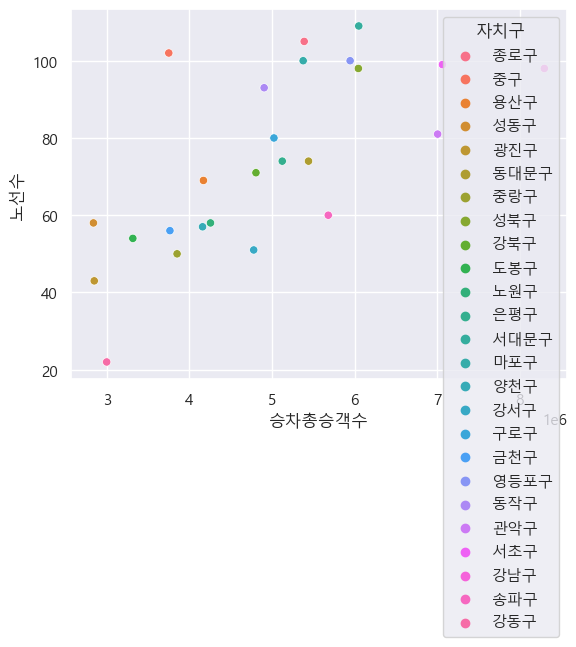

PearsonRResult(statistic=0.6900839473428642, pvalue=0.00013496795467327278)

In [52]:
sns.scatterplot(x='승차총승객수', y='노선수', data= df, hue='자치구')
plt.show()
import scipy.stats as spst
spst.pearsonr(df['승차총승객수'],df['노선수'])

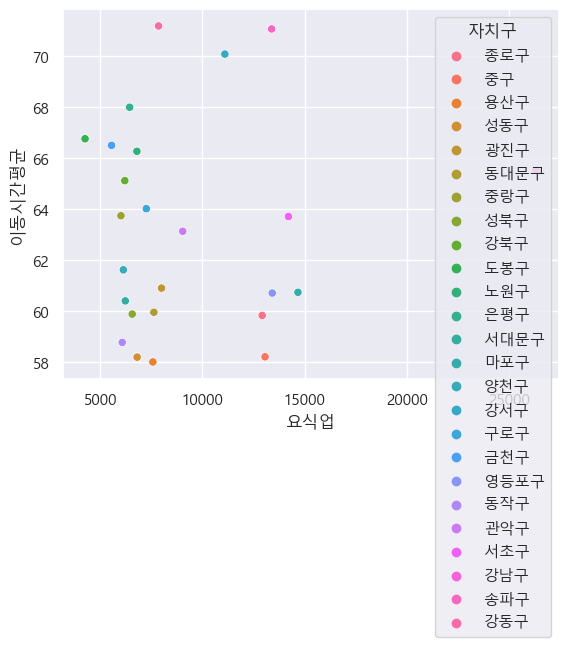

PearsonRResult(statistic=0.05691272686554982, pvalue=0.7869957123238069)

In [59]:
sns.scatterplot(x='요식업', y='이동시간평균', data= df, hue='자치구')
plt.show()
import scipy.stats as spst
spst.pearsonr(df['요식업'],df['이동시간평균'])

### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.
    
상관계수 (우리가 배운 기준)
- 0.5 ~ 1 : 강한
- 0.2 ~ 0.5 : 중간
- 0.1 ~ 0.2 : 약간
- 0 ~ 0.1 : 없음
- 음수 똑같음 

p-value 기준을 0.05로 가져죠? 5%
p-value가 0.05보다 크다 == 귀무가설을 기각 하지 못한다 == 대립가설이 틀렸다(우리가 원하는 바는 대립가설)

- 귀무가설을 기각하려면 우리가 싫어하는 귀무가설을 입증할 증거가 나올 확률이 5% 이하여야 함
- p-value가 그 귀무가설을 입증할 증거가 나올 확률을 의미함


In [32]:
import seaborn as sns

In [30]:
target = df['택시']

### 1)

<Axes: xlabel='노선당 이동인구', ylabel='택시'>

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45432 (\N{HANGUL SYLLABLE NO}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 45817 (\N{HANGUL SYLLABLE DANG}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\events.p

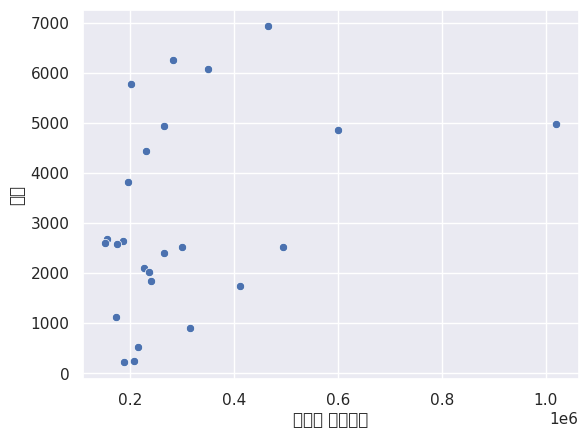

In [45]:
# 노선당 이동인구 -> 택시 수 (산점도)
sns.scatterplot(x='노선당 이동인구', y='택시', data = df)

### 2)

<Axes: xlabel='이동시간평균', ylabel='노선수'>

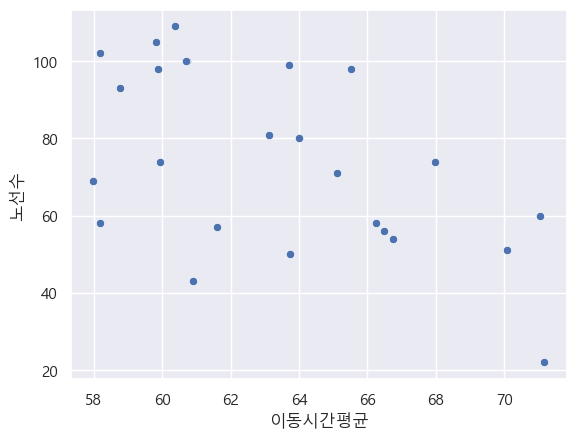

In [43]:
sns.scatterplot(x='이동시간평균', y='노선수', data = df)

<Axes: xlabel='총 종업원수', ylabel='이동시간평균'>

C:\Users\User\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51333 (\N{HANGUL SYLLABLE JONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\User\anaconda3\Lib\site-packages\IPython\core\events.py:93: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font

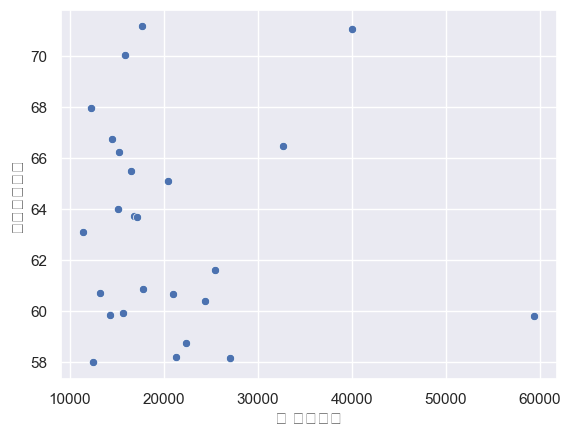

In [64]:
sns.scatterplot(x='총 종업원수', y='이동시간평균', data = df)

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [47]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

spst.pearsonr(df['노선당 이동인구'],df['택시'])

PearsonRResult(statistic=0.38161939335128225, pvalue=0.059786818534267705)

In [53]:
spst.pearsonr(df['이동시간평균'],df['노선수'])

PearsonRResult(statistic=-0.5451657321744252, pvalue=0.004828245942394804)

In [68]:
spst.pearsonr(df['총 종업원수'],df['이동시간평균'])

PearsonRResult(statistic=-0.048788203225081164, pvalue=0.8168566899209669)

In [49]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(df_seoul_bus_station.corr(), annot = True)
plt.show()

ValueError: could not convert string to float: '강남구'

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는 무엇일까요?
### 조원들과 상의해서 각자의 인사이트를 도출하고 발표자료를 만들어보세요.